mpmath.sumem(f, interval, tol=None, reject=10, integral=None, adiffs=None, bdiffs=None, verbose=False, error=False, _fast_abort=False)

Uses the Euler-Maclaurin formula to compute an approximation accurate to within tol (which defaults to the present epsilon) of the sum

In [1]:
# https://mpmath.org/doc/current/calculus/sums_limits.html
from mpmath import *

In [2]:
mp.dps = 50; mp.pretty = True

In [3]:
f = lambda n: 1/n^2
a = 32
b = inf

In [4]:
sumem(f, [32, inf])

0.03174336652030209012658168043874142714132886413417

In [5]:
sumem(f, [a, b])

0.03174336652030209012658168043874142714132886413417

In [6]:
I = mpf(1)/32
I

0.03125

In [7]:
D = adiffs=((-1)**n*fac(n+1)*32**(-2-n) for n in range(999))
D

<generator object <genexpr> at 0x7f0a46ea9b50>

In [8]:
((-1)^n*fac(n+1)*a^(-2-n) for n in range(999))

<generator object <genexpr> at 0x7f0a46e450d0>

In [9]:
da = [(-1)^n*fac(n+1)*a^(-2-n) for n in range(999)]
da

[0.0009765625,
 -0.00006103515625,
 0.0000057220458984375,
 -0.0000007152557373046875,
 0.000000111758708953857421875,
 -0.0000000209547579288482666015625,
 0.000000004583853296935558319091796875,
 -0.00000000114596332423388957977294921875,
 0.0000000003223021849407814443111419677734375,
 -0.00000000010071943279399420134723186492919921875,
 0.0000000000346223050229355067131109535694122314453125,
 -0.0000000000129833643836008150174166075885295867919921875,
 0.000000000005274491780837831100825496832840144634246826171875,
 -0.0000000000023075901541165511066111548643675632774829864501953,
 0.0000000000010816828847421333312239788426722952863201498985291,
 -0.00000000000054084144237106666561198942133614764316007494926453,
 0.00000000000028732201625962916610636938008482843542878981679678,
 -0.00000000000016161863414604140593483277629771599492869427194819,
 0.000000000000095961064024212084773806960926768871988912223969237,
 -0.000000000000059975665015132552983629350579230544993070139980773,
 0

In [10]:
da[0]

0.0009765625

In [11]:
[da[2*k-1]*(bernoulli(2*k)/fac(2*k)) for k in range(1, int((999-1)/4))]

[-0.0000050862630208333333333333333333333333333333333333333,
 0.00000000099341074625651041666666666666666666666666666666667,
 -0.00000000000069294834420794532412574404761904761904761904761905,
 9.4739031434680024782816569010416666666666666666667e-16,
 -2.1026951223961298114083933107780687736742424242424e-18,
 6.8606566042809850173914824670433124779781579097985e-21,
 -3.0881409535313033195199257837278613199790318806966e-23,
 1.833279580639890379908017916186921348864915689417e-25,
 -1.3876676222287769370625081493036584877022374612101e-27,
 1.3043919651661561776017740200056116131578432655381e-29,
 -1.4906994334856612957449482605544148530307507732984e-31,
 2.0354919685549090795727887768426649422438662795564e-33,
 -3.2728269070641796065331785100016930903931841893307e-35,
 6.120475083858352151440376049596004187313844389059e-37,
 -1.3171786793189868387724864802539534813550792861908e-38,
 3.2321884263115323743952681857962699601650323178124e-40,
 -8.970772319630790919558282832182509855694732126

In [12]:
sum([da[2*k-1]*(bernoulli(2*k)/fac(2*k)) for k in range(1, int((999-1)/4))])

-0.0000050852703020901228328002040213042944033234102062964

In [13]:
sumem(f, [32, inf], integral=I, adiffs=D)

0.03174336652030209012658168043874142714132886413417

In [14]:
integral(1/x^2, x)

-1/x

In [15]:
#integrate(1/x^2, (x, a, b))
int_f = (-1/b)-(-1/a)
int_f

0.03125

In [16]:
(1/32).n()

0.0312500000000000

In [17]:
f(a)

1/1024

In [18]:
f(b)

0.0

In [19]:
(f(a)+f(b))/2

0.00048828125

In [20]:
int_f+(f(a)+f(b))/2

0.03173828125

In [21]:
t = lambda k_max : sum([da[2*k-1]*(bernoulli(2*k)/fac(2*k)) for k in range(1, int(k_max))])

In [22]:
sumem(f, [a, b]) - (int_f+(f(a)+f(b))/2)

0.0000050852703020901265816804387414271413288641341697438

In [23]:
-t(25)

0.0000050852703020901265816804387414271413288641341697438

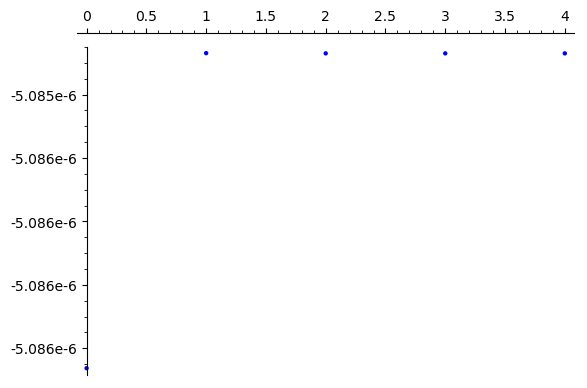

In [44]:
list_plot([t(k_max) for k_max in range(2,7)])

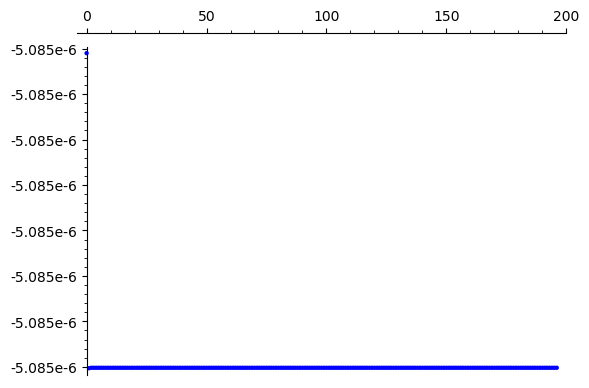

In [28]:
list_plot([t(k_max) for k_max in range(3,200)])

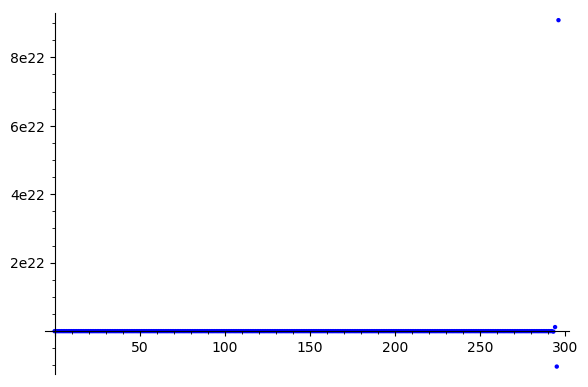

In [29]:
list_plot([t(k_max) for k_max in range(3,300)])

In [25]:
sumem(f, [a, b]) - (int_f)

0.00049336652030209012658168043874142714132886413416974

In [26]:
sum([(-1)^n*fac(n+1)*a^(-2-n)*(bernoulli(2*n)/fac(2*n)) for n in range(999)])

0.00097146826594772678136079593532506462590339393728503